# Initialization

Connect to Google Drive:

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from joblib import dump

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1= load_processed_data('input')
    
y_train, y_test = load_processed_data('output')

%matplotlib inline

## Select dataset

At first, we choose the dataset to be used for training and testing the model.

In [4]:
X_train = X_train_tfidf_L1
X_test = X_test_tfidf_L1

# Basic training

We define the model with the default parameters and train it.

In [4]:
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)

DecisionTreeClassifier()

Evaluate this model using a preset function:

Score of on train are:
	- Accuracy score: 0.9865
	- Micro F1 score: 0.9865
	- Macro F1 score: 0.9824
Score of on test are:
	- Accuracy score: 0.8173
	- Micro F1 score: 0.8173
	- Macro F1 score: 0.7780


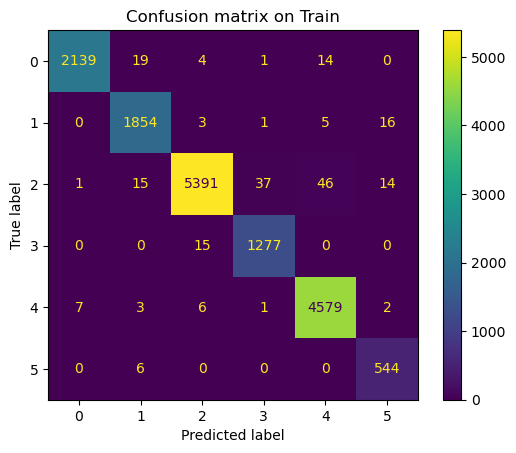

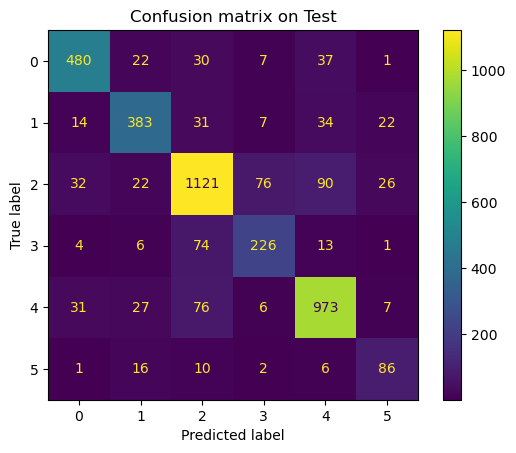

In [5]:
evaluate_model(DT, X_train, X_test, y_train, y_test, include_training=True)

Draw learning curve using a preset function:

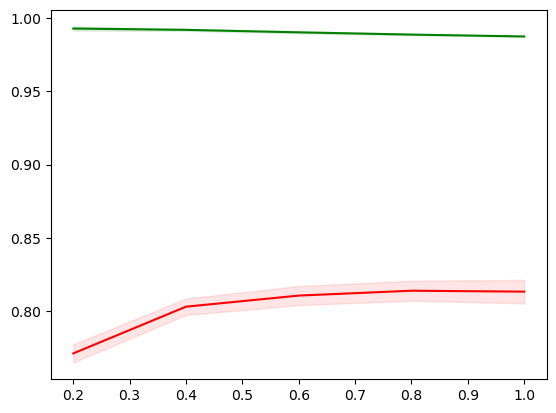

In [6]:
draw_learning_curve(DT, X_train, y_train)

# Single tuning

This section examines the best range for each parameters by plotting the performance of the model with a range of value for each parameters.

## Max_depth

***max_depth*** is the maximum depth of the tree.

In [7]:
# Setting the possible value for max depth
max_depth_list = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 15000]

trs_list = list()
cvs_list = list()

for max_depth in max_depth_list:
    # Define model for each max_depth
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    
    # Calculate the cross validation score
    train_score = accuracy_score(y_train, dt_model.predict(X_train))
    cvs_score = np.mean(cross_val_score(dt_model, X_train, y_train, cv=5, n_jobs=4))
    
    trs_list.append(train_score)
    cvs_list.append(cvs_score)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[Text(0, 0, '20'),
 Text(1, 0, '50'),
 Text(2, 0, '100'),
 Text(3, 0, '200'),
 Text(4, 0, '500'),
 Text(5, 0, '1000'),
 Text(6, 0, '2000'),
 Text(7, 0, '5000'),
 Text(8, 0, '10000'),
 Text(9, 0, '15000')]

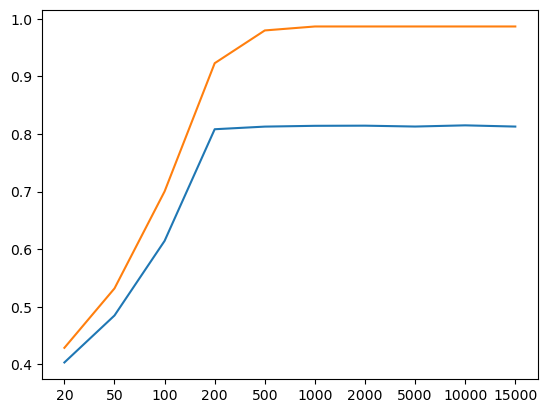

In [8]:
# Draw the plot for max depth
fig = sns.lineplot(x=list(range(len(max_depth_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(max_depth_list))), y=trs_list)
fig.set_xticks(range(len(max_depth_list)))
fig.set_xticklabels(max_depth_list)

## Min_samples_split

***min_samples_split*** is the minimum number of samples required to split an internal node.

In [9]:
# Setting the possible value for max depth
min_samples_split_list = [10, 25, 50, 100, 200, 500, 1000, 2000, 5000]

trs_list = list()
cvs_list = list()

for min_samples_split in min_samples_split_list:
    # Define model for each max_depth
    dt_model = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt_model.fit(X_train, y_train)
    
    # Calculate the cross validation score
    train_score = accuracy_score(y_train, dt_model.predict(X_train))
    cvs_score = np.mean(cross_val_score(dt_model, X_train, y_train, cv=5, n_jobs=-1))
    
    trs_list.append(train_score)
    cvs_list.append(cvs_score)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[Text(0, 0, '10'),
 Text(1, 0, '25'),
 Text(2, 0, '50'),
 Text(3, 0, '100'),
 Text(4, 0, '200'),
 Text(5, 0, '500'),
 Text(6, 0, '1000'),
 Text(7, 0, '2000'),
 Text(8, 0, '5000')]

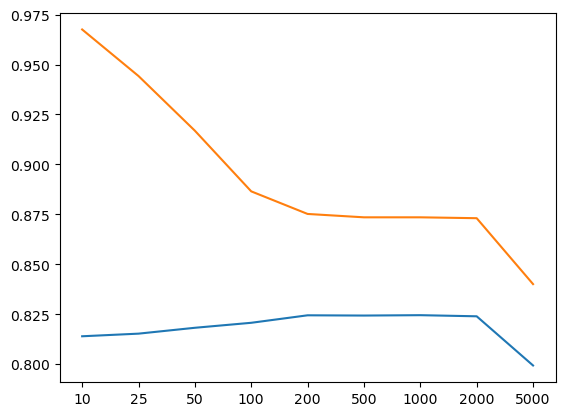

In [10]:
# Draw the plot for max depth
fig = sns.lineplot(x=list(range(len(min_samples_split_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(min_samples_split_list))), y=trs_list)
fig.set_xticks(range(len(min_samples_split_list)))
fig.set_xticklabels(min_samples_split_list)

## Min_samples_leaf

***min_samples_leaf*** is the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ***min_samples_leaf*** training samples in each of the left and right branches.

In [11]:
# Setting the min sample leaf range
min_samples_leaf_list = [1, 5, 10, 25, 50, 75, 100]
trs_list = list()
cvs_list = list()

for min_samples_leaf in min_samples_leaf_list:
  # Define model for each k
  dt_model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
  dt_model.fit(X_train, y_train)

  # Calculate the cross validation score
  train_score = accuracy_score(y_train, dt_model.predict(X_train))
  cv_score = np.mean(cross_val_score(dt_model, X_train, y_train, cv=5, n_jobs=-1))
  
  trs_list.append(train_score)
  cvs_list.append(cv_score)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[Text(0, 0, '1'),
 Text(1, 0, '5'),
 Text(2, 0, '10'),
 Text(3, 0, '25'),
 Text(4, 0, '50'),
 Text(5, 0, '75'),
 Text(6, 0, '100')]

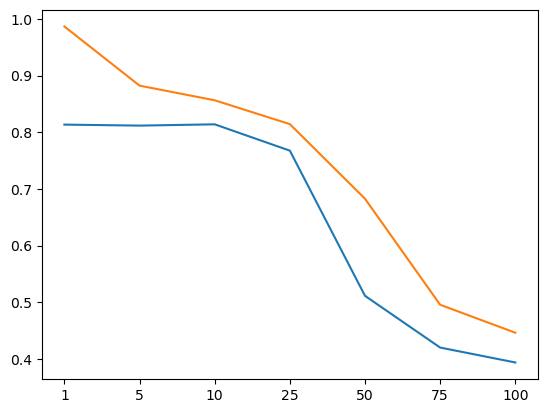

In [12]:
# Draw the plot for min_samples_leaf
fig = sns.lineplot(x=list(range(len(min_samples_leaf_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(min_samples_leaf_list))), y=trs_list)
fig.set_xticks(range(len(min_samples_leaf_list)))
fig.set_xticklabels(min_samples_leaf_list)

From the plot, we can see that the higher this parameter is, the lower the accuracy for both training and testing are.

# Multiple tuning

First, we use grid search to help tuning this model.

In [13]:
dict_param = {
    'max_depth' : np.asarray([100, 1000, 5000]),
    'min_samples_split': np.asarray([10, 100, 1000, 5000]),
    'min_samples_leaf': np.asarray([5, 25, 100]),
}

grid_search = GridSearchCV(DecisionTreeClassifier(), dict_param, cv = 5, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'max_depth': array([ 100, 1000, 5000]),
                         'min_samples_leaf': array([  5,  25, 100]),
                         'min_samples_split': array([  10,  100, 1000, 5000])})

We elminate all parameters that appear in models with the validation accuracy < $0.82$

In [14]:
df = pd.DataFrame(
  dict(
    max_depth = [val['max_depth'] for val in grid_search.cv_results_['params']],
    min_samples_split = [val['min_samples_split'] for val in grid_search.cv_results_['params']],
    min_samples_leaf = [val['min_samples_leaf'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)

df = df[df['score'] <= 0.82]

for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 36 // len(dict_param[param]) :
      print(param, value)

max_depth 100
min_samples_split 10
min_samples_split 5000
min_samples_leaf 25
min_samples_leaf 100


We repeat this process again, this time with the domain narrowed down.

In [15]:
dict_param = {
    'max_depth' : np.asarray([200, 1000, 2000]), 
    'min_samples_split': np.asarray([500, 1000, 2000]),
    'min_samples_leaf': np.arange(1, 8)
}

grid_search = GridSearchCV(DecisionTreeClassifier(), dict_param, cv = 5, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'max_depth': array([ 200, 1000, 2000]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([ 500, 1000, 2000])})

In [18]:
df = pd.DataFrame(
  dict(
    max_depth = [val['max_depth'] for val in grid_search.cv_results_['params']],
    min_samples_split = [val['min_samples_split'] for val in grid_search.cv_results_['params']],
    min_samples_leaf = [val['min_samples_leaf'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)

df = df[df['score'] <= 0.82]

for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 63 // len(dict_param[param]) :
      print(param, value)
      

max_depth 200


Find the best combination of parameters for the model:

In [17]:
print(grid_search.best_estimator_, grid_search.best_score_)

DecisionTreeClassifier(max_depth=2000, min_samples_leaf=4,
                       min_samples_split=500) 0.8268125


# Max_leaf_nodes

This parameter is tuned separately after finding the best combination of other parameters because it is very time-consuming.

First, we examine this parameter in a wide range of value.

In [19]:
# Setting the max_leaf_nodes range
max_leaf_nodes_list = [50, 100, 250, 500, 1000, 2000]
trs_list = list()
cvs_list = list()

for max_leaf_nodes in max_leaf_nodes_list:
  # Define model for each k
  dt_model = DecisionTreeClassifier(max_depth=2000, min_samples_leaf=4,
                       min_samples_split=500, max_leaf_nodes=max_leaf_nodes)
  dt_model.fit(X_train, y_train)

  # Calculate the cross validation score
  train_score = accuracy_score(y_train, dt_model.predict(X_train))
  cv_score = np.mean(cross_val_score(dt_model, X_train, y_train, cv=5, n_jobs=8))
  
  trs_list.append(train_score)
  cvs_list.append(cv_score)

Then, we plot the result.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[Text(0, 0, '50'),
 Text(1, 0, '100'),
 Text(2, 0, '250'),
 Text(3, 0, '500'),
 Text(4, 0, '1000'),
 Text(5, 0, '2000')]

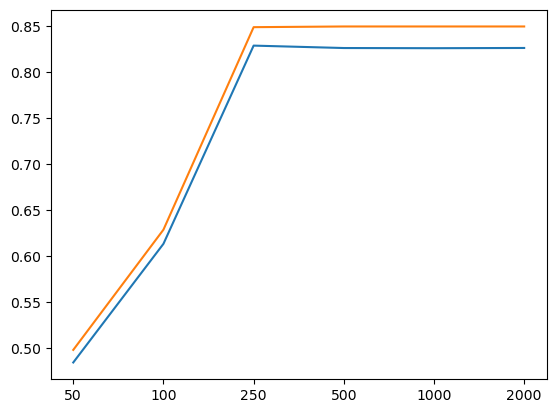

In [20]:
# Draw the plot for max_leaf_nodes
fig = sns.lineplot(x=list(range(len(max_leaf_nodes_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(max_leaf_nodes_list))), y=trs_list)
fig.set_xticks(range(len(max_leaf_nodes_list)))
fig.set_xticklabels(max_leaf_nodes_list)

The plot shows that it would be the most ideal for this parameter to be near $250$.

We further examine by plotting the performance of this model in the range $(200, 300)$.

In [21]:
# Setting the max_leaf_nodes range
max_leaf_nodes_list = [i for i in range(200, 301, 10)]
trs_list = list()
cvs_list = list()

for max_leaf_nodes in max_leaf_nodes_list:
  # Define model for each k
  dt_model = DecisionTreeClassifier(max_depth=2000, min_samples_leaf=4,
                       min_samples_split=500, max_leaf_nodes=max_leaf_nodes)
  dt_model.fit(X_train, y_train)

  # Calculate the cross validation score
  train_score = accuracy_score(y_train, dt_model.predict(X_train))
  cv_score = np.mean(cross_val_score(dt_model, X_train, y_train, cv=5, n_jobs=8))
  
  trs_list.append(train_score)
  cvs_list.append(cv_score)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[Text(0, 0, '200'),
 Text(1, 0, '210'),
 Text(2, 0, '220'),
 Text(3, 0, '230'),
 Text(4, 0, '240'),
 Text(5, 0, '250'),
 Text(6, 0, '260'),
 Text(7, 0, '270'),
 Text(8, 0, '280'),
 Text(9, 0, '290'),
 Text(10, 0, '300')]

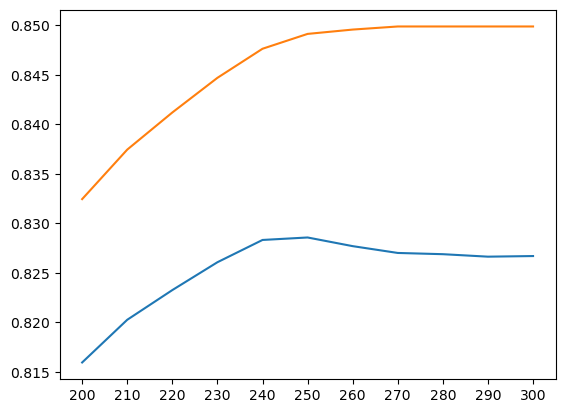

In [22]:
# Draw the plot for max_leaf_nodes
fig = sns.lineplot(x=list(range(len(max_leaf_nodes_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(max_leaf_nodes_list))), y=trs_list)
fig.set_xticks(range(len(max_leaf_nodes_list)))
fig.set_xticklabels(max_leaf_nodes_list)

It is illustrated from the plot that this parameter should be near $250$.

After all the plotting, we use GridSearchCV to find the best value for it.

In [5]:
dict_param = {'max_leaf_nodes': [i for i in range(235, 266, 3)]}

best_max_leaf_nodes = GridSearchCV(DecisionTreeClassifier(max_depth=2000, min_samples_leaf=4,
                       min_samples_split=500), param_grid = dict_param, n_jobs = -1, cv = 10, scoring = 'accuracy')

best_max_leaf_nodes.fit(X_train, y_train)

print("Best max leaf nodes parameter for decision tree:", best_max_leaf_nodes.best_params_)
data_best_max_leaf_nodes_y = best_max_leaf_nodes.predict(X_test)
print("Accuracy of that model:", accuracy_score(data_best_max_leaf_nodes_y, y_test))

Best max leaf nodes parameter for decision tree: {'max_leaf_nodes': 253}
Accuracy of that model: 0.823


So, the best ***max_leaf_nodes*** parameter is $253$.

# Conclusion

We use all the parameters from the last section to define the best model and then evaluate it using the preset functions.

Score of on train are:
	- Accuracy score: 0.8493
	- Micro F1 score: 0.8493
	- Macro F1 score: 0.8054
Score of on test are:
	- Accuracy score: 0.8227
	- Micro F1 score: 0.8227
	- Macro F1 score: 0.7772


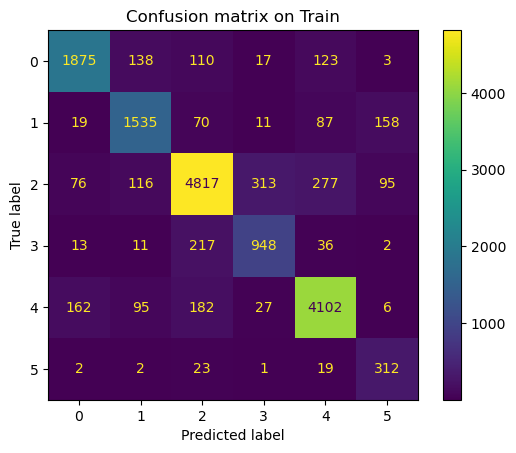

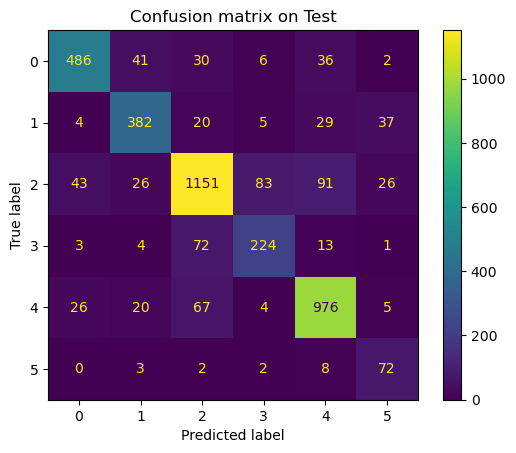

In [7]:
best_dt_model = DecisionTreeClassifier(max_depth=2000, min_samples_leaf=4,
                       min_samples_split=500, max_leaf_nodes=253)
best_dt_model.fit(X_train, y_train)

evaluate_model(best_dt_model, X_train, X_test, y_train, y_test, include_training=True)

After that, we draw the learning curve of this Decision Tree model.

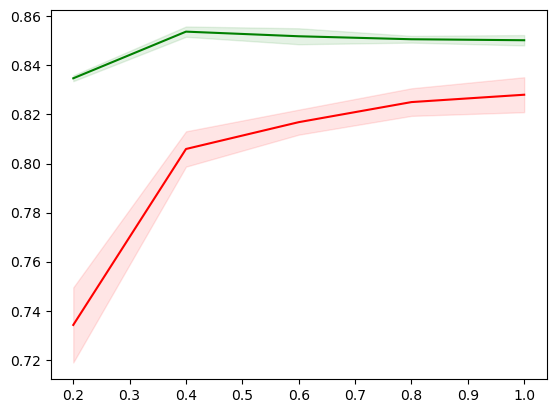

In [8]:
draw_learning_curve(best_dt_model, X_train, y_train)

Finally, we export the model.

In [9]:
directory = "data/models/"

dump(best_dt_model, directory + "best_dt_model_tfidf_l1.joblib")

['data/models/best_dt_model_tfidf_l1.joblib']